In [59]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import vegas
import random as rand

alpha = 1 / 132.184
m_W = 80.379
m_Z = 91.1876
m_e = 0.511E-3
m_m = 105.66E-3
m_h = 125.1
e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e
C_HWB = 10 ** -10
C_HD = C_HWB
v_alt = v / (1 + v ** 2 * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def diff_decay(n, m, k_ml, v, CW, SW, x):
    ml = k_ml * m_e
    s_min_fix = 4 * ml ** 2 
    s_max_fix = m_h ** 2 
    t_min_fix = ml ** 2
    t_max_fix = (m_h - ml) ** 2
    s = (s_max_fix - s_min_fix) * n + s_min_fix
    t = (t_max_fix - t_min_fix) * m + t_min_fix
    N = (1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)) * (ml ** 2 / v ** 2)
    u = m_h ** 2 + 2 * ml ** 2 - s - t
    struc_4 = 4 * e ** 2 * (m_h ** 4 + s ** 2) / (t * u)
    struc_6 = (8 * 2 ** 0.5 * e * m_h ** 2) * (x * 10 ** (-6)) * (SW - CW)
    struc_8 = 8 * t * u * x ** 2 * 10 ** (-12) * (SW - CW) ** 2
    I = x/x
    return [I * N * struc_4, I * N * struc_6, I * N * struc_8]

def diff_decay_alt2(s, t, ml, v, CW, SW, x):
    N = (1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)) * (ml ** 2 / v ** 2)
    u = m_h ** 2 + 2 * ml ** 2 - s - t
    struc_4 = 4 * e ** 2 * (m_h ** 4 + s ** 2) / (t * u)
    struc_6 = (8 * 2 ** 0.5 * e * m_h ** 2) * (x * 10 ** (-6)) * (SW - CW)
    struc_8 = 8 * t * u * x ** 2 * 10 ** (-12) * (SW - CW) ** 2
    return [1, struc_6 / struc_4, struc_8 / struc_4]

def SM_decay(n, m, v, k_ml, C_HD, C_HWB, cos, sin, x):
    s_min_fix = 4 * ml ** 2 
    s_max_fix = m_h ** 2 
    t_min_fix = ml ** 2
    t_max_fix = (m_h - ml) ** 2
    s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
    t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
    v_alt = v / (1 + v ** 2 * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))
    return (x/x) * diff_decay_alt2(s_pick, t_pick, ml, v_alt, cos, sin, x)[0]

def SMEFT_decay(n, m, v, k_ml, C_HD, C_HWB, cos, sin, x):
    ml = k_ml * m_e
    s_min_fix = 4 * ml ** 2 
    s_max_fix = m_h ** 2 
    t_min_fix = ml ** 2
    t_max_fix = (m_h - ml) ** 2
    s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
    t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
    v_alt = v / (1 + v ** 2 * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))
    return diff_decay_alt2(s_pick, t_pick, ml, v_alt, cos, sin, x)[2]

def SM_SMEFT_decay(n, m, v, k_ml, C_HD, C_HWB, cos, sin, x):
    ml = k_ml * m_e
    s_min_fix = 4 * ml ** 2 
    s_max_fix = m_h ** 2 
    t_min_fix = ml ** 2
    t_max_fix = (m_h - ml) ** 2
    s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
    t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
    v_alt = v / (1 + v ** 2 * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))
    return diff_decay_alt2(s_pick, t_pick, ml, v_alt, cos, sin, x)[1]

In [62]:
v_alt = v / (1 + v ** 2 * (cos / sin) * (10**-6 + (cos / (4 * sin)) * 10**-6))
print(v_alt)

211.1727470092557


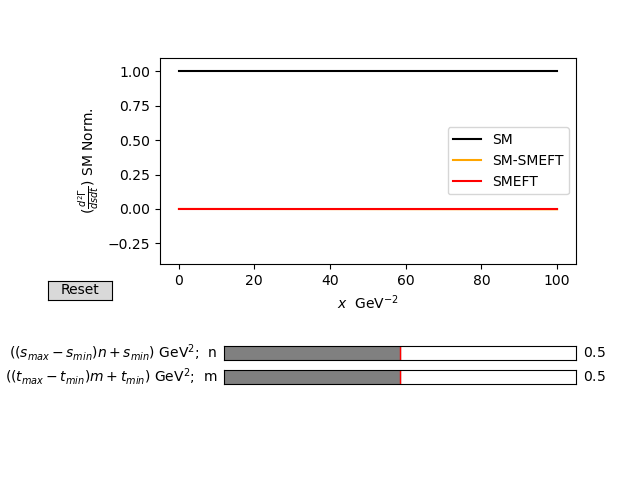

In [58]:
init_n = 0.5
init_m = 0.5
init_k_ml = 1000
x = np.linspace(0.1,100,100)
k_ml = m_m / m_e

fig, ax = plt.subplots()
plt.ylim(-0.4, 1.1)
line, = ax.plot(x, diff_decay(init_n, init_m, k_ml, v_alt, cos, sin, x)[0]/diff_decay(init_n, init_m, k_ml, v_alt, cos, sin, x)[0], color = 'black', label = 'SM')
line6, = ax.plot(x, diff_decay(init_n, init_m, k_ml, v_alt, cos, sin, x)[1]/diff_decay(n_slider.val, m_slider.val, k_ml, v_alt, cos, sin, x)[0], color = 'orange', label = 'SM-SMEFT')
line8, = ax.plot(x, diff_decay(init_n, init_m, k_ml, v_alt, cos, sin, x)[2]/diff_decay(n_slider.val, m_slider.val, k_ml, v_alt, cos, sin, x)[0], color = 'red', label = 'SMEFT')
ax.set_xlabel('$x$  GeV$^{-2}$')
ax.set_ylabel(r'$(\frac{d^{2}\Gamma}{dsdt})$ SM Norm.')
plt.legend()

fig.subplots_adjust(left=0.25, bottom=0.45)

axs = fig.add_axes([0.35, 0.25, 0.55, 0.03])
n_slider = Slider(
    ax=axs,
    label=r'$((s_{max} - s_{min})n + s_{min})$ GeV$^{2}$;  n',
    valmin=0,
    valmax=1,
    valinit=init_n,
    color = 'gray')

axt = fig.add_axes([0.35, 0.2, 0.55, 0.03])
m_slider = Slider(
    ax=axt,
    label=r'$((t_{max} - t_{min})m + t_{min})$ GeV$^{2}$;  m',
    valmin=0,
    valmax=1,
    valinit=init_m,
    color = 'gray')

def update(val):
    line.set_ydata(diff_decay(n_slider.val, m_slider.val, k_ml, v_alt, cos, sin, x)[0]/diff_decay(n_slider.val, m_slider.val, k_ml, v_alt, cos, sin, x)[0])
    line6.set_ydata(diff_decay(n_slider.val, m_slider.val, k_ml, v_alt, cos, sin, x)[1]/diff_decay(n_slider.val, m_slider.val, k_ml, v_alt, cos, sin, x)[0])
    line8.set_ydata(diff_decay(n_slider.val, m_slider.val, k_ml, v_alt, cos, sin, x)[2]/diff_decay(n_slider.val, m_slider.val, k_ml, v_alt, cos, sin, x)[0])
    fig.canvas.draw_idle()

n_slider.on_changed(update)
m_slider.on_changed(update)

resetax = fig.add_axes([0.075, 0.375, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    n_slider.reset()
    m_slider.reset()
button.on_clicked(reset)

plt.show()

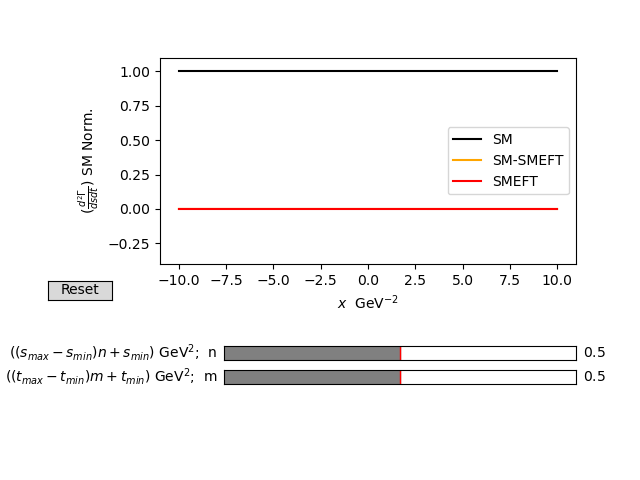

In [37]:
init_n = 0.5
init_m = 0.5
init_k_ml = 1000
x = np.linspace(-10,10,100)
C_HWB = 10 ** -10
C_HD = C_HWB
k_ml = m_m / m_e

fig, ax = plt.subplots()
plt.ylim(-0.4, 1.1)
line, = ax.plot(x, diff_decay(init_n, init_m, v, k_ml, C_HD, C_HWB, cos, sin, x), color = 'black', label = 'SM')
line6, = ax.plot(x, SM_SMEFT_decay(init_n, init_m, v, k_ml, C_HD, C_HWB, cos, sin, x), color = 'orange', label = 'SM-SMEFT')
line8, = ax.plot(x, SMEFT_decay(init_n, init_m, v, k_ml, C_HD, C_HWB, cos, sin, x), color = 'red', label = 'SMEFT')
ax.set_xlabel('$x$  GeV$^{-2}$')
ax.set_ylabel(r'$(\frac{d^{2}\Gamma}{dsdt})$ SM Norm.')
plt.legend()

fig.subplots_adjust(left=0.25, bottom=0.45)

axs = fig.add_axes([0.35, 0.25, 0.55, 0.03])
n_slider = Slider(
    ax=axs,
    label=r'$((s_{max} - s_{min})n + s_{min})$ GeV$^{2}$;  n',
    valmin=0,
    valmax=1,
    valinit=init_n,
    color = 'gray')

axt = fig.add_axes([0.35, 0.2, 0.55, 0.03])
m_slider = Slider(
    ax=axt,
    label=r'$((t_{max} - t_{min})m + t_{min})$ GeV$^{2}$;  m',
    valmin=0,
    valmax=1,
    valinit=init_m,
    color = 'gray')

def update(val):
    line.set_ydata(SM_decay(n_slider.val, m_slider.val, v, k_ml, C_HD, C_HWB, cos, sin, x))
    line6.set_ydata(SM_SMEFT_decay(n_slider.val, m_slider.val, v, k_ml, C_HD, C_HWB, cos, sin, x))
    line8.set_ydata(SMEFT_decay(n_slider.val, m_slider.val, v, k_ml, C_HD, C_HWB, cos, sin, x))
    fig.canvas.draw_idle()

n_slider.on_changed(update)
m_slider.on_changed(update)

resetax = fig.add_axes([0.075, 0.375, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    n_slider.reset()
    m_slider.reset()
button.on_clicked(reset)

plt.show()

In [10]:
SMEFT_decay(0.5, 0.5, v, 1000, 1, 1, cos, sin, 1)

2.8096275282037003e-09